# 뉴스 기사 분류: 다중 분류 문제

## 1. 로이터 데이터셋

In [1]:
# 로이터 데이터셋 로드하기
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [2]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [3]:
# 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key)
                          for (key, value) in word_index.items()])

decoded_newswire = ' '.join(
    # 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다.
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [4]:
train_labels[10]

3

## 2. 데이터 준비

In [5]:
# 데이터 인코딩하기
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# 레이블을 벡터로 변환: 원-핫 인코딩(one-hot encoding, categorical encoding) 사용
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
# 케라스 내장함수 사용
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 3. 모델 구성

In [9]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [10]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 4. 훈련 검증

In [11]:
# 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
# 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2023-06-01 00:24:50.157641: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 3s 38ms/step - loss: 2.5147 - accuracy: 0.5412 - val_loss: 1.6701 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3594 - accuracy: 0.7102 - val_loss: 1.2663 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0062 - accuracy: 0.7791 - val_loss: 1.0989 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7894 - accuracy: 0.8275 - val_loss: 1.0034 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6242 - accuracy: 0.8681 - val_loss: 0.9515 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5030 - accuracy: 0.8984 - val_loss: 0.9357 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4009 - accuracy: 0.9173 - val_loss: 0.9217 - val_accuracy: 0.8030
Epoch 8/20
16/16 [======

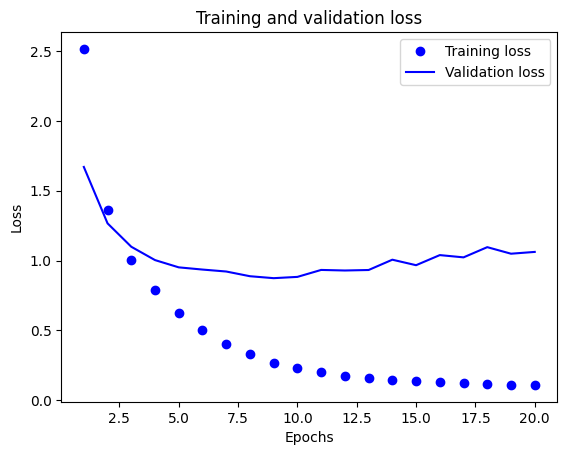

In [13]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

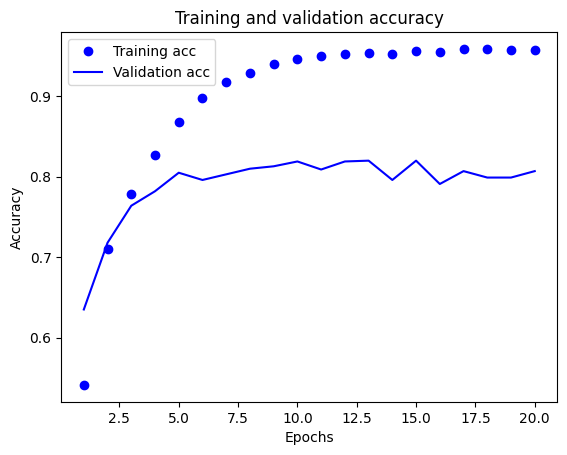

In [16]:
# 훈련과 검증 정확도 그리기
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

results

Epoch 1/9
16/16 [==============================] - 1s 25ms/step - loss: 2.5965 - accuracy: 0.5223 - val_loss: 1.6869 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.3930 - accuracy: 0.7108 - val_loss: 1.2804 - val_accuracy: 0.7200
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0303 - accuracy: 0.7859 - val_loss: 1.1448 - val_accuracy: 0.7470
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8074 - accuracy: 0.8310 - val_loss: 1.0346 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6416 - accuracy: 0.8659 - val_loss: 0.9728 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5115 - accuracy: 0.8941 - val_loss: 0.9356 - val_accuracy: 0.8130
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4113 - accuracy: 0.9126 - val_loss: 0.9986 - val_accuracy: 0.7940
Epoch 8/9
16/16 [===

[0.9912261366844177, 0.790739119052887]

In [18]:
# 무작위로 분류할 경우 정확도
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array) / len(test_labels))

0.19412288512911843

## 5. 새로운 데이터에 대해 예측하기

In [19]:
# 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

71/71 [==============================] - 0s 2ms/step
(46,)
0.9999999
3


## 6. 충분히 큰 중간층을 두어야 하는 이유

In [23]:
# 정보 병목이 있는 모델
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 2.6861 - accuracy: 0.4660 - val_loss: 1.9340 - val_accuracy: 0.5840
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.6915 - accuracy: 0.6161 - val_loss: 1.6326 - val_accuracy: 0.6260
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.4457 - accuracy: 0.6349 - val_loss: 1.5406 - val_accuracy: 0.6110
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.3130 - accuracy: 0.6408 - val_loss: 1.4676 - val_accuracy: 0.6220
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.2148 - accuracy: 0.6461 - val_loss: 1.4519 - val_accuracy: 0.6220
Epoch 6/20
63/63 [==============================] - 1s 13ms/step - loss: 1.1329 - accuracy: 0.6609 - val_loss: 1.4449 - val_accuracy: 0.6390
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0612 - accuracy: 0.6967 - val_loss: 1.4581 - val_accuracy: 0.6570
Epoch 8/20
63

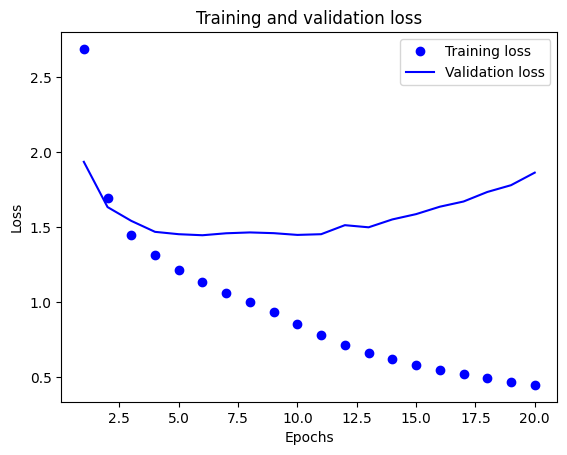

In [24]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

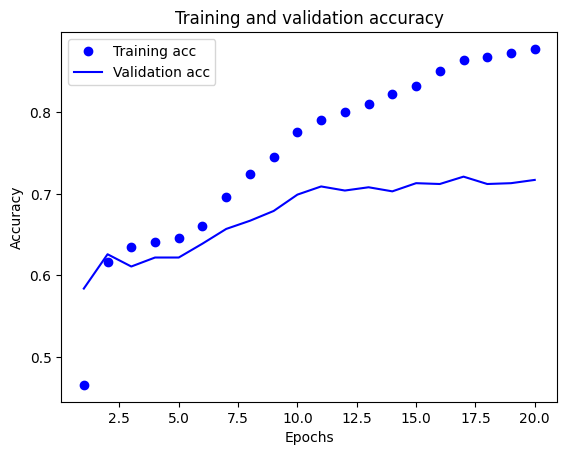

In [25]:
# 훈련과 검증 정확도 그리기
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()